# Deep learning with Keras 3.0

Keras is a high-level deep learning library written in Python. It provides a user-friendly and intuitive interface for building and training neural networks. One of the key features of Keras is its ability to work with different backend engines, such as TensorFlow, Theano, and CNTK. It offers a wide range of pre-defined layers, including `convolutional layers`, `recurrent layers`, and `dense layers`, which can be easily stacked together to create complex network architectures. It also provides a variety of `loss functions`, `optimizers`, and `metrics` for training and evaluating models.

We will work with `feedforward neural networks`,  a special kind of neural networks using Keras.

> Outline
- Artificial neural networks (ANN)
- Demo's
    - Iris dataset
    - MNIST (handwritten digits)


## Artificial neural network

An artificial neural network (ANN) is a computational model inspired by the biological neural networks found in the brain. It is a machine learning algorithm that can be trained to recognize patterns and make predictions based on input data. We will be working with the `feedforward neural network`, which are basically directed acyclic graphs. The networks consist of interconnected nodes, called `artificial neurons` or `units`, organized into `layers`. There is the `input` and `output` layers and in between them possibly one or more `hidden` layers.


__Single layer perceptron (SLP)__

SLP is the simplest feedforward neural network. It can solve various logical or classification problems.

$$
output = f(w \cdot x + b)
$$

with $f$ the `activation` function, e.g. `binary step`, `sigmoid`, `ReLU`, etc.

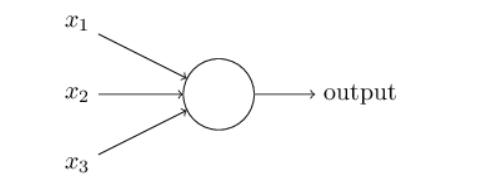

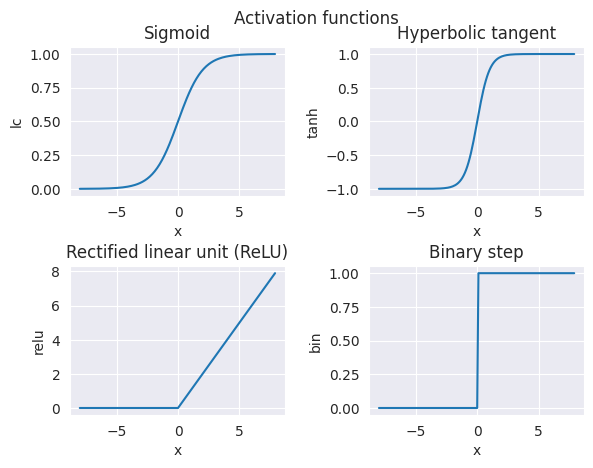

In [287]:
import ml_utils3
prf = ml_utils3.Profile()
prf.activations()

__Neural networks with hidden layers__

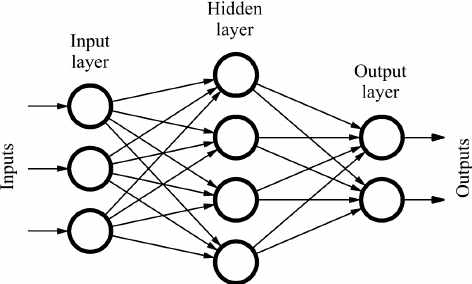

## Learning

The input layer receives data, which is then processed through one or more hidden layers, and finally produces an output in the output layer. During training, the ANN adjusts the weights to minimize the difference between its predicted output and the desired output, using a technique called `backpropagation`, which involves a minimisation such as `stochastic gradient descent (SGD)`. This process involves propagating the error backward through the network, updating the weights accordingly, and iteratively repeating this process until the network learns to produce accurate predictions.

The full review of the process is beyond the scope of this demo.


## (1) Iris dataset

Here we create a network with:
- input layer with 4 neurons one for each feature
- hidden layer with 16 neurons
- output layer with 3 neurons, one for each Iris class.

In [288]:
import keras
import numpy as np

In [289]:
# Data preparation
from ml_utils3 import Iris
iris = Iris('data/iris.csv')
x_train, x_test, y_train, y_test = iris.split(test_size=0.4)
# one-hot / dummy matrix 
y_train_oh = keras.utils.to_categorical(y_train)
y_test_oh = keras.utils.to_categorical(y_test)

In [290]:
import keras 

model = keras.Sequential(
    [
        keras.layers.Input(shape=(4,), name="In"),
        keras.layers.Dense(16, activation='relu', name="L1"),
        keras.layers.Dense(3, activation='softmax', name="Out")
    ]
)

model.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Out (Dense)                     │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

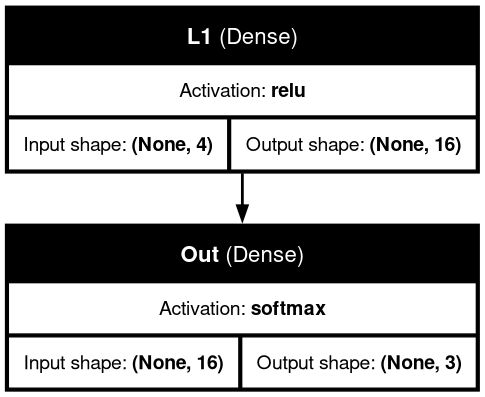

In [291]:
keras.utils.plot_model(model, show_shapes=True,show_layer_names=True,dpi=100,show_layer_activations=True)

In [ ]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[        
        keras.metrics.CategoricalAccuracy(name="accuracy"),
    ],
)

history = model.fit(
    x_train,
    y_train_oh,
    validation_data=(x_test, y_test_oh),
    batch_size=50,
    epochs=1000,
    shuffle=True,
    verbose=1
)

> Loss/accuracy curves

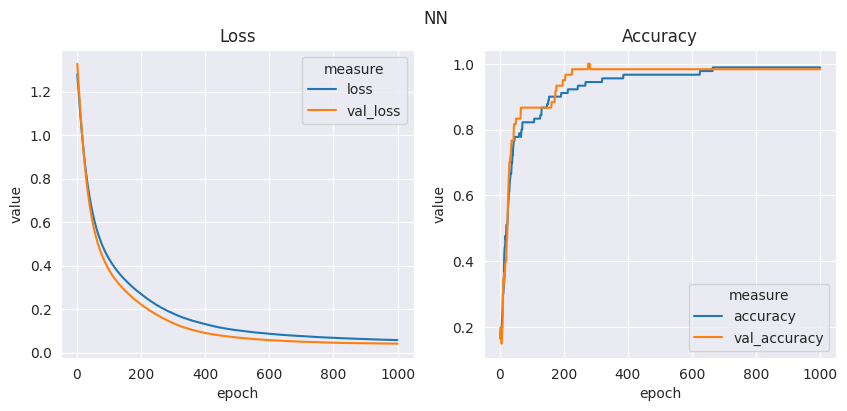

In [293]:
prf = ml_utils3.Profile(history)
prf.plot0()

In [294]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

When the architecture of the model is defined, we need to specify the details of the learning procedure. It is done using the method `.compile()`. The main parameters  are:

- `loss` - loss function - a function whose value is minimized throughout the training;
- `optimizer` - optimization algorithm that is used for parameters' update. For most of the tasks, the __Adam optimizer__ works the best, but [optimisers](https://keras.io/api/optimizers/) for more options.
- `metrics` - quality metrics that are being evaluated and reported throughout the training procedure.

To train the model, similarly as in Scikit-learn, we use the method `.fit()`. The main parameters are:
- `x` - input data;
- `y` - target data;
- `batch size` - number of training samples that need to go through the model before the weights and biases of the model will be updated;
- `epochs` - number of times the complete dataset will be passed through the network;


### Over/Under-fitting

Models are optimised to best fit the training data. The process may be exaggerated thus far that the `training error`, model's error on training data, is minimised. However, this will not guarantee the model's performance on unobserved input, i.e. high `test error`.

- Overfitting  : model fails to perform on new input, large difference between training and test error
- Underfitting : model fails to fit the data, i.e. high training error

### (2) MNIST dataset

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database is a well-known collection of handwritten digit images used for training and testing machine learning algorithms, particularly in the field of image recognition. MNIST stands for Modified National Institute of Standards and Technology database. The database contains 60,000 training examples and 10,000 testing examples. Each example is a grayscale image of a handwritten digit (0 to 9) with a resolution of 28x28 pixels. The images are normalized and centered, making them consistent for analysis.


In [295]:
# Import the dataset from the Keras collection (requires tensorflow,tensorrt)
from keras.api.datasets import mnist
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The data is already divided into separate training and test sets.

In [296]:
type(x_train), x_train.shape

(numpy.ndarray, (60000, 28, 28))

The training set is composed of 60000 matrices of the shape 28x28. We can visualise the content of the matrix with the matplotlib function `.imshow()`. Below is a sample of 100:

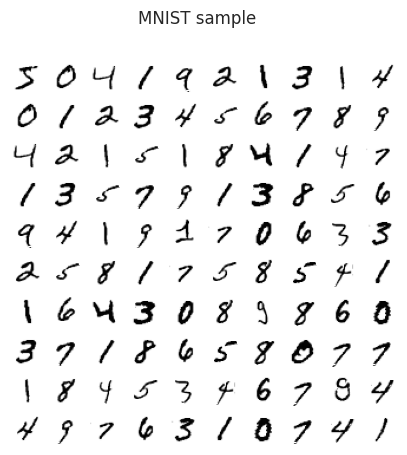

In [297]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10,figsize=(5,5))
fig.suptitle("MNIST sample")
for i in range(10):
    for j in range(10):
        axes[i,j].grid('on', linestyle='--')
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])
        axes[i,j].imshow(x_train[(i+1)*(j+1)-1], cmap='Greys')


Here is the type and dimensions of each matrix:

In [299]:
print(x_train.shape, x_train.dtype, x_train.min(), x_train.max())
print(y_train.shape, y_train.dtype, y_train.min(), y_train.max())

(60000, 28, 28) uint8 0 255
(60000,) uint8 0 9


In [300]:
# Transform grey-scale [0,255] to [0,1]
x_train= x_train/255
x_test=x_test/255
x_train.min(), x_train.max()

(0.0, 1.0)

The second step is to __reshape__ the image so that it can be "fed" into ML model.

Each image should be represented as 3D tensor:
- First two dimensions of which correspond to the actual shape of an image (in our case 28x28),
- The third dimension tells how many color channels has the image.

The MNIST images are grayscale, so the color channel is only one -> the last dimension of the resulting tensor should be equal to 1.

Beware that in case of Red-Green-Blue (RGB) images (with three color channels) the last dimension has to be equal to 3.

In [301]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [302]:
# One-Hot encoding of training labels
y_train_oh = np.eye(10)[y_train]
y_test_oh = np.eye(10)[y_test]
y_train_oh[0], y_train[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 5)

In [303]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(28,28,1)),
        keras.layers.Flatten(name="In"),
        keras.layers.Dense(16, activation='relu', name="L1"),
        keras.layers.Dense(16, activation='relu', name="L2"),
        keras.layers.Dense(10, activation='softmax', name="Out")
    ]
)
model.summary()

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ In (Flatten)                    │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Out (Dense)                     │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [304]:
28*28, 28*28*16+16, 16*16+16,16*10+10 

(784, 12560, 272, 170)

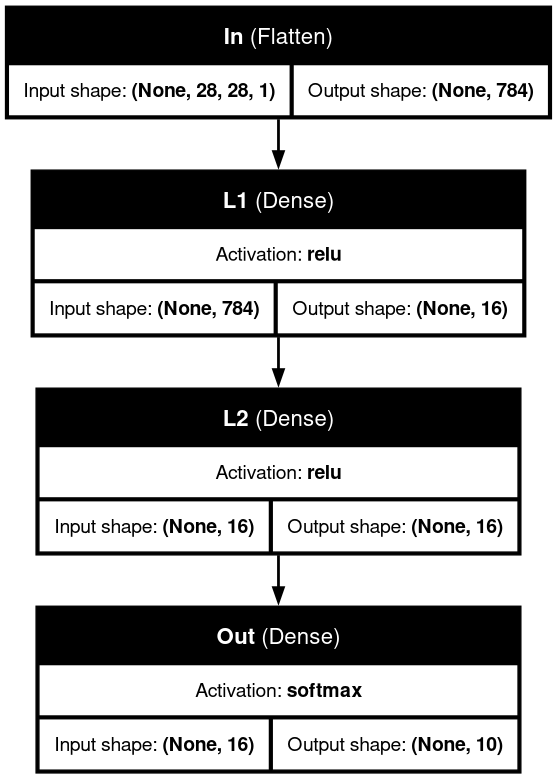

In [305]:
keras.utils.plot_model(model, show_shapes=True,show_layer_names=True,dpi=100,show_layer_activations=True)

In [ ]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        #keras.metrics.SparseCategoricalAccuracy(name="acc"),
        keras.metrics.CategoricalAccuracy(name="accuracy"),
    ],
)

# Fit
history = model.fit(
    x_train,
    y_train_oh,
    validation_data=(x_test, y_test_oh),
    batch_size=128,
    epochs=30,
    validation_split=0.0,
    shuffle=True,
    verbose=1
)

> Loss/accuracy curves 

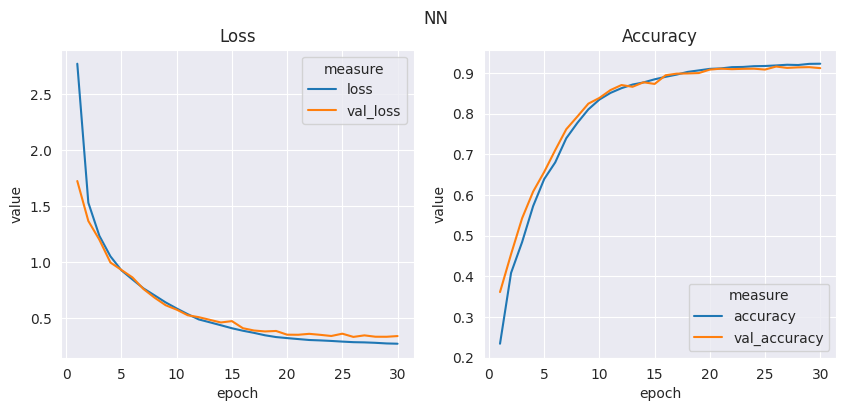

In [307]:
prf = ml_utils3.Profile(history)
prf.plot0()

In [308]:
# fit
# history = model.fit(x_train, y_train_oh,validation_data=(x_test,y_test_oh), epochs=10, batch_size=128, verbose=1)
prediction = model.predict(x_test, verbose=0)
x_test.shape, prediction.shape



((10000, 28, 28), (10000, 10))

For each item of the test set we obtain a vector of size 10 corresponding to the activation function of the output layer. The  output vector represents the probabilities for each digit in one-hot encoding:

In [309]:
# Probabilities
prediction[0]

array([6.1590777e-04, 4.1089523e-05, 2.7425953e-03, 2.2003476e-03,
       1.7735299e-04, 5.4722554e-05, 2.7898345e-08, 9.8589140e-01,
       4.2815367e-04, 7.8483233e-03], dtype=float32)

In [310]:
prediction[0].sum()      # sum (roughly) to 1

0.9999999

In [311]:
np.argmax(prediction[0]) # highest probability is the prediction

7

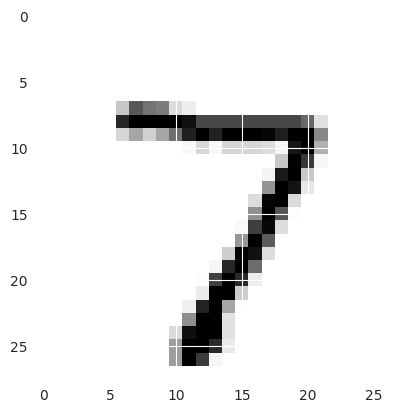

In [312]:
plt.imshow(x_test[0].reshape(28,28),cmap='Greys'); # image that was classified

In [313]:
y_test[0] # label of the image

7

We can calculate the percentage of misclassification:

In [314]:
m = model.evaluate(x_test,y_test_oh, verbose=0)
f"(%) : {(1- m[1])*100:.2f}"

'(%) : 8.79'

and one of them is shown below:

Text(0.5, 1.0, 'predicted: 5,  actual: 5')

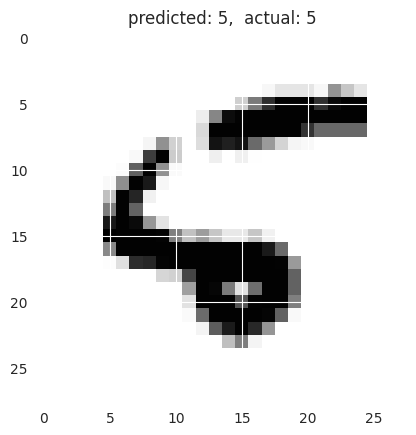

In [315]:
plt.imshow(x_test[8].reshape(28,28),cmap='Greys')
plt.title(f"predicted: {np.argmax(prediction[8])},  actual: {y_test[8]}")

__Exercise__

Find the indexes of the all misclassified items of the test set.

In [316]:
y_pred = np.array([np.argmax(p) for p in prediction])
(failed,) = np.where(y_pred!=y_test)

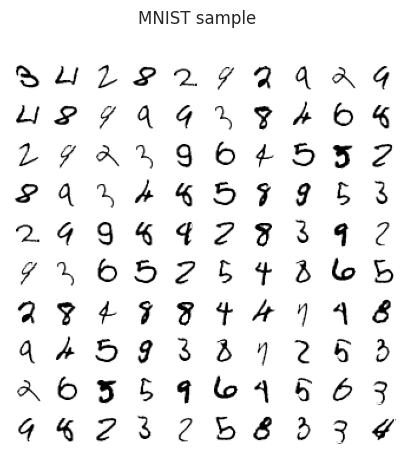

In [317]:
fig, axes = plt.subplots(10,10,figsize=(5,5))
fig.suptitle("MNIST sample")
for i in range(10):
    for j in range(10):
        axes[i,j].grid('on', linestyle='--')
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])
        axes[i,j].imshow(x_test[failed[(i+1)*(j+1)-1]], cmap='Greys')